In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [2]:
print(tf.__version__)

2.0.0-rc0


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import os

In [5]:
data = pd.read_csv('C:/Users/DELL/Desktop/Projects/KGP Talkie/Deep Learning/Data/creditcard.csv')

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Balance Dataset

In [10]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [11]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [12]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [13]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,70689.0,-0.259879,0.699389,0.125772,-1.246340,2.596914,3.401019,0.323824,0.717450,-0.374336,...,-0.333934,-0.877408,-0.097086,0.983397,-0.062538,0.057976,0.103971,-0.108962,2.97,0
980,161774.0,1.861929,-0.309541,-1.707917,0.401221,0.083931,-1.252614,0.549526,-0.391903,0.661335,...,0.180925,0.414169,0.010978,1.148366,0.287559,-0.586763,-0.035663,-0.031257,107.81,0
981,58474.0,-0.091824,-0.777321,2.219802,-1.670665,-1.912615,-0.200829,-0.857941,0.151843,-1.448851,...,-0.160713,-0.043658,0.047795,0.344816,-0.203150,-0.232805,0.083716,0.037792,50.00,0
982,114209.0,1.768510,-0.510677,-1.009336,0.077673,-0.101602,-0.342223,0.006559,-0.059658,0.176855,...,-0.325436,-1.275678,0.472961,0.671466,-0.780841,-0.044264,-0.093270,-0.029057,126.84,0


In [14]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [15]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((787, 30), (787,), (197, 30), (197,))

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_train

array([[-0.90867299,  0.27715005, -0.60425132, ..., -0.12950423,
        -0.05378623, -0.04761896],
       [ 0.7666941 ,  0.78377102, -0.7230228 , ..., -0.08797729,
        -0.11057226, -0.21941165],
       [-1.44352549, -2.08958336,  1.18977519, ...,  2.45874374,
        -2.22580793, -0.34161525],
       ...,
       [-1.57340146, -0.38894168,  0.32196764, ..., -1.34598222,
         1.45545618, -0.26162496],
       [-0.77677801,  0.63353687, -0.42190388, ..., -0.06072895,
        -0.03750792, -0.22665132],
       [ 0.82001248,  0.71973469, -0.58898617, ..., -0.13962935,
        -0.05631582,  0.18856878]])

In [19]:
y_train

845    0
898    0
45     1
536    0
739    0
      ..
202    1
711    0
31     1
882    0
563    0
Name: Class, Length: 787, dtype: int64

In [20]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [21]:
y_train

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [22]:
x_train.shape

(787, 30)

In [23]:
#x_train = x_train.reshape(x_train.reshape[0], x_train.reshape[1], 1)
#x_test  = x_test.reshape(x_test.reshape[0], x_test.reshape[1], 1)

x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197,30, 1)

In [24]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

In [25]:
x_train

array([[[-0.90867299],
        [ 0.27715005],
        [-0.60425132],
        ...,
        [-0.12950423],
        [-0.05378623],
        [-0.04761896]],

       [[ 0.7666941 ],
        [ 0.78377102],
        [-0.7230228 ],
        ...,
        [-0.08797729],
        [-0.11057226],
        [-0.21941165]],

       [[-1.44352549],
        [-2.08958336],
        [ 1.18977519],
        ...,
        [ 2.45874374],
        [-2.22580793],
        [-0.34161525]],

       ...,

       [[-1.57340146],
        [-0.38894168],
        [ 0.32196764],
        ...,
        [-1.34598222],
        [ 1.45545618],
        [-0.26162496]],

       [[-0.77677801],
        [ 0.63353687],
        [-0.42190388],
        ...,
        [-0.06072895],
        [-0.03750792],
        [-0.22665132]],

       [[ 0.82001248],
        [ 0.71973469],
        [-0.58898617],
        ...,
        [-0.13962935],
        [-0.05631582],
        [ 0.18856878]]])

### Build CNN

In [26]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation= 'relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [28]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1) 

Train on 787 samples, validate on 197 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
787/787 [==============================] - 6s 7ms/sample - loss: 0.8095 - accuracy: 0.6404 - val_loss: 0.6017 - val_accuracy: 0.8274
Epoch 2/20
787/787 [==============================] - 0s 506us/sample - loss: 0.5230 - accuracy: 0.7929 - val_loss: 0.5404 - val_accuracy: 0.8579
Epoch 3/20
787/787 [==============================] - 0s 316us/sample - loss: 0.4062 - accuracy: 0.8577 - val_loss: 0.4949 - val_accuracy: 0.8883
Epoch 4/20
787/787 [==============================] - 0s 308us/sample - loss: 0.3970 - accuracy: 0.8615 - val_loss: 0.4550 - val_accuracy: 0.9036
Epoch 5/20
787/787 [==============================] - 0s 318us/sample - loss: 0.3481 - accuracy: 0.8717 - val_loss: 0.4198 - val_accuracy: 0.9086
Epoch 6/20
787/787 [==============================] - 0s 309us/sample - loss: 0.3063 - accuracy: 0.8933 - val_loss: 0.3970 - val_acc

In [30]:
history.history

{'loss': [0.8095161488428807,
  0.5230464783829686,
  0.40615002267545486,
  0.39701578676170435,
  0.348060679784118,
  0.30626673186067704,
  0.29052329252756837,
  0.3086290314812521,
  0.24101452482095062,
  0.26371290011206,
  0.24694127793006096,
  0.24195454105867364,
  0.23985792181467616,
  0.24962065360370403,
  0.24710742979673753,
  0.22148993671924974,
  0.2365833216049771,
  0.257759887673046,
  0.22497630622971618,
  0.22656853603059485],
 'accuracy': [0.6404066,
  0.79288435,
  0.8576874,
  0.86149937,
  0.8716645,
  0.89326555,
  0.9021601,
  0.90597206,
  0.90851337,
  0.9186785,
  0.9110546,
  0.9110546,
  0.9186785,
  0.9135959,
  0.9161372,
  0.9275731,
  0.9301143,
  0.9186785,
  0.9250318,
  0.9212198],
 'val_loss': [0.6017055375321867,
  0.540361615606976,
  0.4948946155872442,
  0.4550232026480176,
  0.41976162049976096,
  0.397037762373232,
  0.35872125837403507,
  0.32831435790521846,
  0.30634607775562306,
  0.288635380906502,
  0.26517660439317,
  0.2483848

In [31]:
def plot_learningCurve(history, epoch):
  # plot training & Validation accuracy values
  epoch_range = range(1,epoch+1)

  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc = 'upper left')
  plt.show()


  # plot training & Validation loss values

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc = 'upper left')
  plt.show()

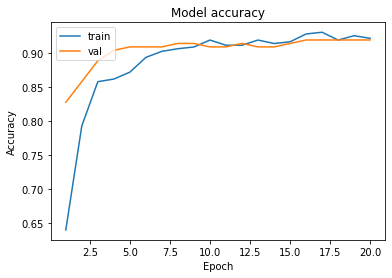

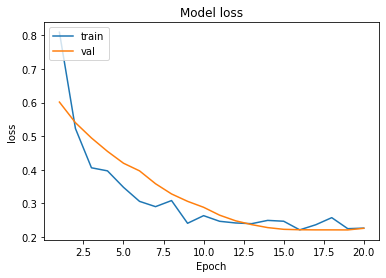

In [32]:
plot_learningCurve(history, epochs)

### Adding MaxPool

Train on 787 samples, validate on 197 samples
Epoch 1/20
787/787 [==============================] - 3s 4ms/sample - loss: 0.9878 - accuracy: 0.5845 - val_loss: 0.6613 - val_accuracy: 0.6853
Epoch 2/20
787/787 [==============================] - 0s 313us/sample - loss: 0.8756 - accuracy: 0.6239 - val_loss: 0.6258 - val_accuracy: 0.7157
Epoch 3/20
787/787 [==============================] - 0s 316us/sample - loss: 0.6960 - accuracy: 0.7141 - val_loss: 0.5944 - val_accuracy: 0.7056
Epoch 4/20
787/787 [==============================] - 0s 295us/sample - loss: 0.6370 - accuracy: 0.7230 - val_loss: 0.5654 - val_accuracy: 0.6904
Epoch 5/20
787/787 [==============================] - 0s 254us/sample - loss: 0.5674 - accuracy: 0.7586 - val_loss: 0.5397 - val_accuracy: 0.6904
Epoch 6/20
787/787 [==============================] - 0s 268us/sample - loss: 0.5175 - accuracy: 0.7751 - val_loss: 0.5122 - val_accuracy: 0.7259
Epoch 7/20
787/787 [==============================] - 0s 280us/sample - loss: 0.

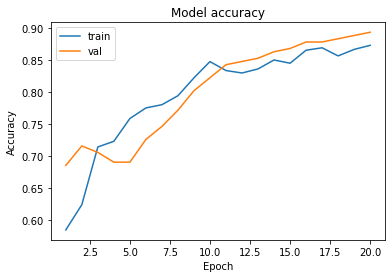

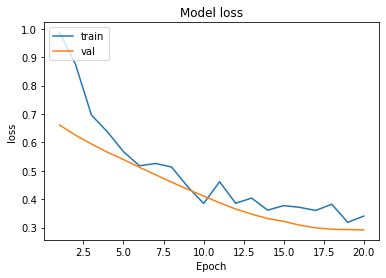

In [33]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation= 'relu', input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1) 


plot_learningCurve(history, epochs)